In [3]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sn 

plt.style.use("dark_background")
pp = print 

In [370]:
def make_poly_np(xdim:float, ydim:float) -> np.ndarray:
    """Polygon as x, y column array."""
    x, y = np.meshgrid(range(2), range(2))
    # flatten according to ccw coordinates
    ccw = [(0, 0), (0, 1), (1, 1), (1, 0), (0, 0)]
    x = np.array([x[i] for i in ccw]) * xdim 
    y = np.array([y[i] for i in ccw]) * ydim
    return np.vstack((x, y))

def make_poly_df(poly_np: np.ndarray) -> pd.DataFrame:
    """Polygon as dataframe."""
    ptnum = poly_np.shape[1]
    poly_df = pd.DataFrame(
        {'x': poly_np[0, :],
         'y': poly_np[1, :]})
    
    # Group adjacent pts as edges 
    # e1, e2: start, end pt index 
    edgenum = ptnum - 1
    edge_idx = np.arange(ptnum).astype(int)
    poly_df['e1'] = edge_idx % edgenum
    poly_df['e2'] = (edge_idx + 1) % edgenum
    
    return poly_df['x y e1 e2'.split(' ')]

def make_seg_mtx(poly_df: pd.DataFrame) -> np.ndarray:
    """Get segment in R=(seg=S x dim=2 x edge=2) form.
    
    Returns:
        seg_mtx: [
            edge1=[[x1,x2], 
                   [y1,y2]],
            ... 
            edgen]
    """
    edgenum = poly_df.shape[0] - 1
    edge_idx_arr = np.arange(edgenum).astype(int)  # unique edge idx
    edge_idx_mtx = poly_df.loc[edge_idx_arr, ['e1', 'e2']].values 
    xy_mtx = poly_df.loc[edge_idx_arr, ['x', 'y']].values
    return xy_mtx[edge_idx_mtx]

poly_np = make_poly_np(2, 1)
poly = make_poly_df(poly_np)
seg_mtx = make_seg_mtx(poly)

ptnum = poly_np.shape[1]
col_ids = 'win ad1 wall ad2'.split(' ')
poly[col_ids] = np.zeros((poly.shape[0], 4)).astype(int)
for i, ci in enumerate(col_ids):
    idx = poly.query(f'(e1 == {i}) or (e2 == {i})').index
    poly.loc[idx, ci] = 1
    
poly.loc[ptnum, col_ids] = 0
poly

,x,y,e1,e2,win,ad1,wall,ad2
0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0
1,2.0,0.0,1.0,2.0,0.0,1.0,1.0,0.0
2,2.0,1.0,2.0,3.0,0.0,0.0,1.0,1.0
3,0.0,1.0,3.0,0.0,1.0,0.0,0.0,1.0
4,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0
5,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0


-
[[0 0]
 [0 1]]
-
[[0 0]
 [2 0]]
-
[[2 0]]
-
[[2 1]]


,x,y,e1,e2,win,ad1,wall,ad2
0,0,0,0,1,1,1,0,0
1,2,0,1,2,0,1,1,0
2,2,1,2,3,0,0,0,1
3,0,1,3,0,1,0,0,0
4,0,0,0,1,0,0,0,0


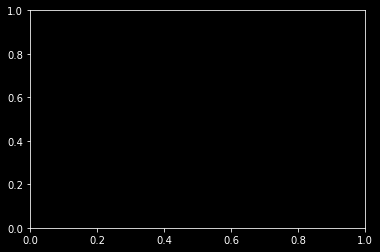

In [346]:
#poly.query('win == 1')[['x', 'y']]

def plot_seg(poly, ax=None, *args, **kwargs):
    col_seg = 'win ad1 wall ad2'.split(' ')
    
    for col in col_seg:
        seg_arr = poly.query(f'{col} == 1')[['x', 'y']].values 
        pp('-')
        pp(seg_arr)
    
def plot(poly, ax=None, *args, **kwargs):
    if ax is None:
        ax = plt.subplots()[1]    
    
    # x, y = poly.x.values, poly.y.values
    # ax.scatter(x, y, *args, **kwargs)
    plot_seg(poly, ax, *args, **kwargs)
    

_ = plot(poly, c='r')
poly
